# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [1]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [2]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col  # Not necessary to use, could use `lm.summary()` instead


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [3]:
dataset = pd.DataFrame([])

<font size = "5">

Create two **random variables** of size ($n = 50$)

In [4]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [5]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [6]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

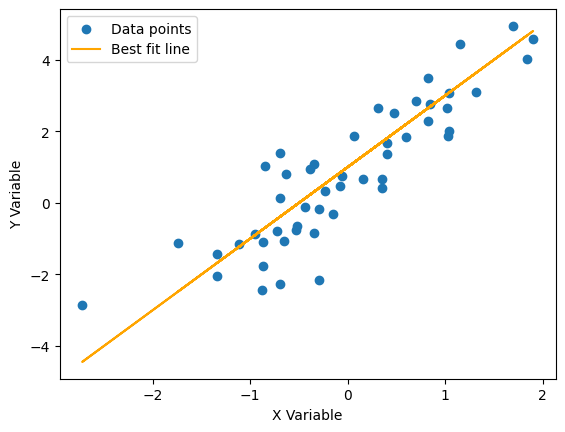

In [11]:
plt.scatter(x = dataset["x"], y = dataset["y"])
# Plot the ture line
plt.plot(dataset["x"], dataset["p"], color = 'orange')

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [8]:
# Write your own code here

# Create a new dataset
subset_above2 = dataset.query('y >= 2')

# Find the number of rows of the dataset
print(len(dataset))
print(len(subset_above2))

# Find the proportion of the subsetted observation
prop = len(subset_above2)/len(dataset)
print(prop)


50
13
0.26


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [ ]:
# Note: abs(...) is the absolute value function
# Write your own code 

# Find the mean and std
ybar = dataset['y'].mean()
ystd = dataset['y'].std()

dataset.query('abs(y - @ybar) <= @ystd')


# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model (i.e., ordinary least square)

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [52]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~ x',data = dataset)
results = model.fit(cov_type = "HC1")

# OR do all those in one line
lm = smf.ols(formula= 'y ~ x', data= dataset).fit(cov_type= 'HC1')      # Set the covariance to be 'Robust standard errors' or 'HC1'
                                                                        # The default is 'nonrobust'
# Check
# print(lm.summary()) # Robust 
# print(model.fit().summary()) # nonrobust

# Find the coefficients
print(lm.params)

# Find the summary table
print(lm.summary())


Intercept    0.855298
x            1.841353
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           9.99e-18
Time:                        17:14:12   Log-Likelihood:                -66.201
No. Observations:                  50   AIC:                             136.4
Df Residuals:                      48   BIC:                             140.2
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

---
## Apply to a real dataset

In [306]:
# Using a real dataset
carfeatures = pd.read_csv("data_raw/features.csv")
# Find the colnames
print(carfeatures.columns.values)
display(carfeatures)


['mpg' 'cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'vehicle_id']


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802
3,16.0,8,304,150,3433,12.0,A-1689813
4,17.0,8,302,140,3449,10.5,F-1689824
...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103
394,44.0,4,97,52,2130,24.6,V-1694114
395,32.0,4,135,84,2295,11.6,D-1694125
396,28.0,4,120,79,2625,18.6,F-1694136


In [307]:
carfeatures.columns.values.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'vehicle_id']

In [308]:
# Find the best model to explain acceleration
# Start with including all variables into the model
lm = smf.ols(formula= 'acceleration ~ mpg + cylinders + horsepower + weight', data=carfeatures).fit(cov_type='HC1') # Robust se
lm.summary() # Need data cleaning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 96, but rank is 62
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acceleration   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     109.2
Date:                Thu, 23 Feb 2023   Prob (F-statistic):          4.93e-173
Time:                        13:00:29   Log-Likelihood:                -676.37
No. Observations:                 397   AIC:                             1547.
Df Residuals:                     300   BIC:                             1933.
Df Model:                          96                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.7743      1.645      5.335      0.000       5.551      11.998
horsepower[T.102]    -0.6258      0.433     -1.444      0.149      -1.475       0.223
horsepower[T.103]     0.8505      0.300      2.838      0.005       0.263       1.438
horsepower[T.105]     0.1602      0.515      0.311      0.756      -0.849       1.170
horsepower[T.107]     0.3614      0.392      0.922      0.357      -0.407       1.130
horsepower[T.108]     0.3701      0.292      1.269      0.204      -0.201       0.942
horsepower[T.110]    -0.2183      0.451     -0.484      0.628      -1.102       0.665
horsepower[T.112]    -0.4226      0.508     -0.831      0.406      -1.419       0.574
horsepower[T.113]    -0.7507      0.418     -1.797      0.072      -1.570       0.068
horsepower[T.115]    -0.9388      0.567     -1.656      0.098      -2.050       0.172
horsepower[T.116]    -2.1418      0.329     -6.519      0.000      -2.786      -1.498
horsepower[T.120]    -1.9657      0.722     -2.722      0.006      -3.381      -0.550
horsepower[T.122]    -1.2080      0.311     -3.882      0.000      -1.818      -0.598
horsepower[T.125]    -1.2705      0.751     -1.693      0.091      -2.742       0.201
horsepower[T.129]    -3.6096      0.459     -7.863      0.000      -4.509      -2.710
horsepower[T.130]    -3.5029      0.661     -5.296      0.000      -4.799      -2.207
horsepower[T.132]    -3.0341      0.470     -6.455      0.000      -3.955      -2.113
horsepower[T.133]    -0.9254      0.279     -3.316      0.001      -1.472      -0.378
horsepower[T.135]    -2.1448      0.454     -4.727      0.000      -3.034      -1.256
horsepower[T.137]    -3.6868      0.443     -8.317      0.000      -4.556      -2.818
horsepower[T.138]    -4.6053      0.447    -10.292      0.000      -5.482      -3.728
horsepower[T.139]    -3.9495      0.532     -7.429      0.000      -4.992      -2.908
horsepower[T.140]    -4.4193      0.602     -7.339      0.000      -5.600      -3.239
horsepower[T.142]    -3.8539      0.450     -8.572      0.000      -4.735      -2.973
horsepower[T.145]    -4.9382      0.615     -8.024      0.000      -6.144      -3.732
horsepower[T.148]    -6.5648      0.544    -12.061      0.000      -7.632      -5.498
horsepower[T.149]    -4.4888      0.491     -9.144      0.000      -5.451      -3.527
horsepower[T.150]    -5.2392      0.518    -10.105      0.000      -6.255      -4.223
horsepower[T.152]    -5.8919      0.463    -12.723      0.000      -6.800      -4.984
horsepower[T.153]    -5.2406      0.484    -10.825      0.000      -6.189      -4.292
horsepower[T.155]    -5.1306      0.960     -5.342      0.000      -7.013      -3.248
horsepower[T.158]    -6.2133      0.480    -12.939      0.000      -7.155      -5.272
horsepower[T.160]    -7.4541      1.229     -6.063      0.000      -9.864

In [309]:
# Find if the datafram contain nans.
print(carfeatures.isna().sum())
# Remove the rows with nan
car_clean = carfeatures.dropna(axis=0) # Specify to remove the row
car_clean.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      1
weight          0
acceleration    0
vehicle_id      0
dtype: int64


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
vehicle_id      0
dtype: int64

In [310]:
# try to convert the datatype, however, there is quesiton marks uncleaned in the horsepower column
# car_clean.astype({'horsepower' : 'float64'}).dtypes

# Find the index of the row containing '?'
# Drop with index
car_clean_final = car_clean.drop(car_clean[car_clean['horsepower'] == '?'].index)

# Convert the dtype
car_clean_final.astype({'horsepower' : 'float64'}, copy=False).dtypes
car_clean_final = car_clean_final.astype({'horsepower' : 'float64'}, copy=False)
car_clean_final.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower      float64
weight            int64
acceleration    float64
vehicle_id       object
dtype: object

### Check the multicolinearity

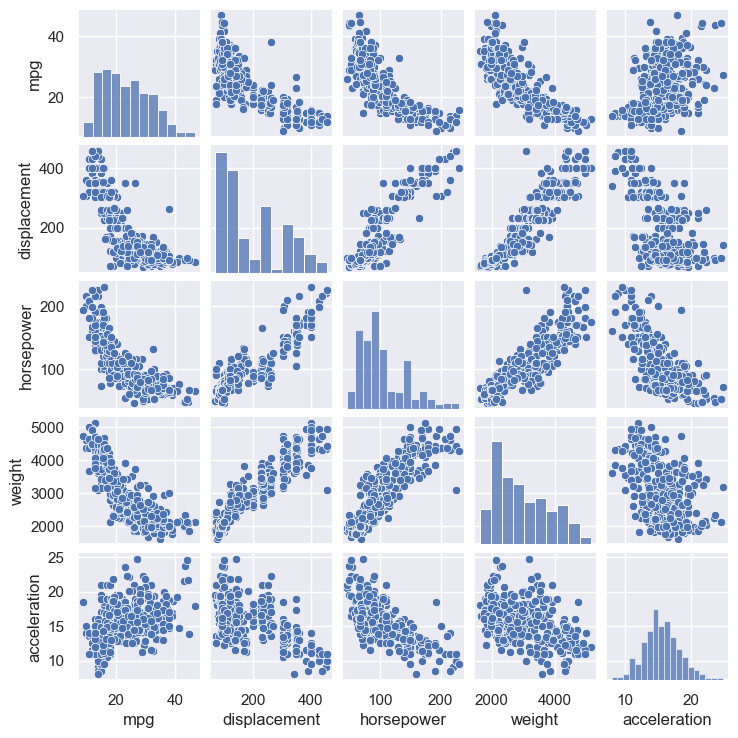

In [267]:
# See the correlation 
import seaborn as sns
sns.pairplot(car_clean_final.drop(columns= ['cylinders','vehicle_id']),
            height = 1.5);


<Axes: >

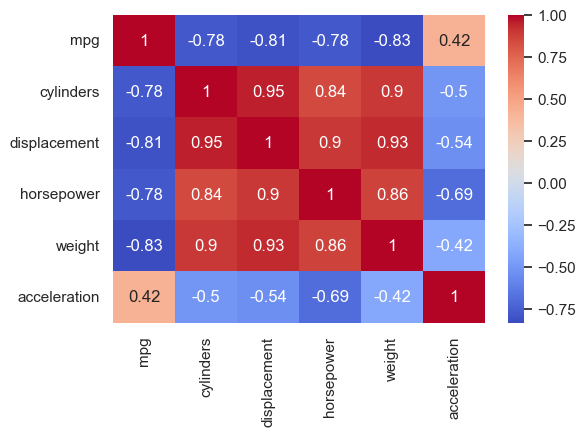

In [263]:
# See the correlation matrix
plt.subplots(figsize = (6,4))
sns.heatmap(car_clean_final.drop(columns= ['vehicle_id']).corr(),
            cmap = 'coolwarm',
            annot = True)

In [314]:
# Got the feature names
ls_remove = ['acceleration', 'vehicle_id']
ls_features_name = car_clean_final.columns.values.tolist()
for x in ls_remove: 
    ls_features_name.remove(x)

print(ls_features_name)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']


In [355]:
# Calculate the VIF for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor as calc_vif

# Create an empty dataframe to store the VIF
vif = pd.DataFrame()
# Assign one column as the name of the features
vif['Features'] = ls_features_name

# NOTE: the inputs of `variance_inflation_factor` is:
#       1) the features matrix 
#       2) the index of the features, which is a for loop 
#       3) the whole thing should be a list
vif['VIF'] = [calc_vif(car_clean_final[ls_features_name].values, i) for i in range(car_clean_final[ls_features_name].shape[1])]

display(vif)

,Features,VIF
0,mpg,10.284890
1,cylinders,103.117030
2,displacement,67.416730
3,horsepower,42.195224
4,weight,79.889547


In [437]:
# Write a function to do backward elimination
def select_feature_vif(df_all_vars, trace, threshold = 5):

    '''
    Arguments: 
        1) df_all_vars: A dataframe only with all features on the columns (i.e. the design matrix)
        2) threshold: could change, but the default is 5
    Output: 
        1) The global variable `vif` showing the final selected features and vif value
        2) The trace showing the backward elimination
    '''

    from statsmodels.stats.outliers_influence import variance_inflation_factor as calc_vif

    # Create an empty dataframe to store the VIF
    global vif
    vif = pd.DataFrame()
    # Assign one column as the name of the features
    vif['Features'] = df_all_vars.columns.values.tolist()
    vif['VIF'] = [calc_vif(df_all_vars.values, i) for i in range(df_all_vars.shape[1])]
    
    if trace == True:
        print('Original VIF table:')
        display(vif)

    index = 1
    while max(vif['VIF']) > 5:
        temp_ls_out_threshold = []
        temp_ls_out_threshold_name = []

        # Find the features whose VIF > threshold
        for i in range(len(vif['VIF'])):
            if vif.iloc[i,1] > threshold:
                temp_ls_out_threshold.append(vif.iloc[i,1])
                temp_ls_out_threshold_name.append(vif.iloc[i,0])
        
        # Find the feature with maximum VIF and drop it in the feature dataframe
        max_vif = max(temp_ls_out_threshold)
        drop_feature_name = vif.query('VIF == @max_vif')['Features'].values[0]
        df_all_vars = df_all_vars.drop(columns=drop_feature_name)

        # Recalculate the VIF table
        vif = pd.DataFrame()
        vif['Features'] = df_all_vars.columns.values.tolist()
        vif['VIF'] = [calc_vif(df_all_vars.values, i) for i in range(df_all_vars.shape[1])]

        if trace == True:
            # Show the trace of backward elimination of VIF regression
            print('Step '+str(index))
            display(vif)
            index += 1
    
    if trace == False:
        return(vif)

In [439]:
select_feature_vif(car_clean_final[ls_features_name], trace = False)

,Features,VIF
0,mpg,2.049214
1,displacement,2.049214


count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64


(array([30., 89., 58., 52., 36., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

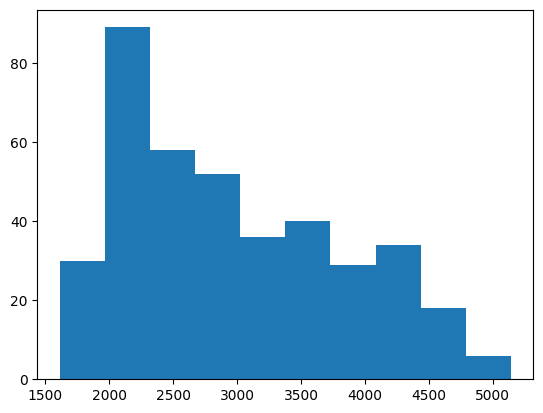

In [170]:
print(car_clean_final['weight'].describe())
plt.hist(car_clean_final['weight'])

In [261]:
# Fit the model again and got the summary table
lm = smf.ols(formula= 'acceleration ~ mpg + C(cylinders) + displacement + horsepower + weight', data=car_clean_final).fit(cov_type='HC1') # Robust se
print(lm.summary()) # Found that `mpg` is not signficant

lm.params.index.values.tolist()
# Partial F test on cylinders
f_test = lm.f_test([('C(cylinders)[T.4] = C(cylinders)[T.5] = C(cylinders)[T.6] = C(cylinders)[T.8] = 0')])
print(f_test) # significant for the cylinders


# CI above 30 => multicolinearity

                            OLS Regression Results                            
Dep. Variable:           acceleration   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     84.52
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           8.04e-80
Time:                        19:06:05   Log-Likelihood:                -761.30
No. Observations:                 392   AIC:                             1541.
Df Residuals:                     383   BIC:                             1576.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.8766      1.37

In [265]:
# Remove the mpg
lm = smf.ols(formula= 'acceleration ~ C(cylinders) + horsepower + weight', data=car_clean_final).fit(cov_type='HC1') # Robust se
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acceleration   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     133.0
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.28e-90
Time:                        19:22:31   Log-Likelihood:                -764.28
No. Observations:                 392   AIC:                             1543.
Df Residuals:                     385   BIC:                             1570.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.9598      0.753     19.859      0.000      13.483      16.436
C(cylinders)[T.4]     1.7965      0.283      6.357      0.000       1.243       2.350
C(cylinders)[T.5]     1.9283      0.438      4.401      0.000       1.069       2.787
C(cylinders)[T.6]     0.9151      0.365      2.510      0.012       0.200       1.630
C(cylinders)[T.8]    -0.0989      0.548     -0.180      0.857      -1.173       0.975
horsepower           -0.0859      0.008    -10.855      0.000      -0.101      -0.070
weight                0.0028      0.000      8.088      0.000       0.002       0.004
==============================================================================
Omnibus:                       50.022   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.296
Skew:                           0.806   Prob(JB):                     9.96e-18
Kurtosis:                       4.482   Cond. No.                     7.15e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 7.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

## Compute the estimated best fit line

In [11]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)   # The true mean is beta0 = 1, beta1 = 2, so it is very close

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    0.803610
x            2.079331
dtype: float64


<font size = "5">

Plot the best fit line

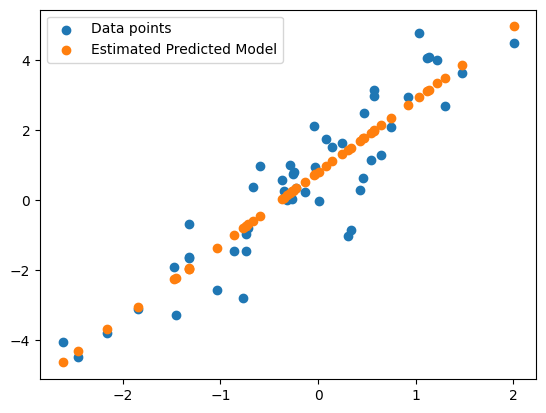

In [12]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

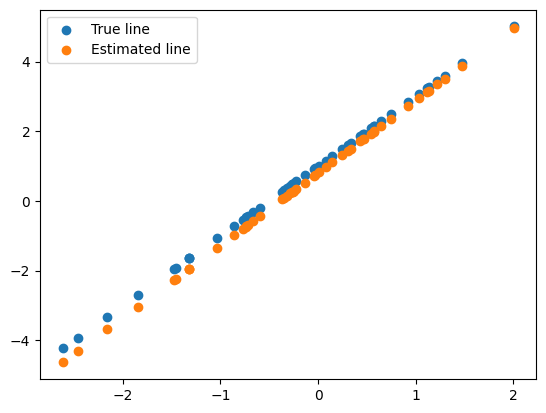

In [13]:
# Write your own code

# Create an overlapping scatterplots
plt.scatter(x=dataset['x'], y = dataset['p'])
plt.scatter(x=dataset['x'], y = dataset['p_estimated'])

plt.legend(['True line','Estimated line']) # Extrapolation was obserserved


<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error  error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [14]:
# Write your own code

sample_error = dataset['y'] - dataset['p_estimated']
fn_pos_error = lambda e: e >= 0

dataset['positive_error'] = sample_error.apply(fn_pos_error)
display(dataset)


,x,e,y,p,p_estimated,positive_error
0,-1.038416,-1.493790,-2.570621,-1.076832,-1.355600,False
1,-1.325987,0.002814,-1.649160,-1.651974,-1.953556,True
2,-0.365601,0.310809,0.579608,0.268799,0.043405,True
3,-1.848815,-0.415665,-3.113294,-2.697629,-3.040688,False
4,-0.282126,0.561074,0.996823,0.435749,0.216978,True
5,1.297762,-0.913092,2.682433,3.595525,3.502089,False
6,-2.616253,0.185491,-4.047014,-4.232505,-4.636446,True
7,-0.245838,0.308787,0.817112,0.508325,0.292433,True
8,-0.859350,-0.719816,-1.438517,-0.718700,-0.983263,False
9,-0.350400,-0.023987,0.275213,0.299201,0.075013,True


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [21]:
# Write your own code

# Compute the square of error
error_sqr = sample_error ** 2
print(error_sqr.mean()) # MSE


0.8710564753123272
